# SVM with Nonlinear Datasets

When classes are linearly separable, then SVM classifiers are efficient and work well in many cases. However, many datasets are not linearly separable. 

One solution is to add more features, such as polynomial features in some cases this can result in a linearly separable dataset.

For example, let's create a one dimensional X1D dataset:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X1D

array([[-4.],
       [-3.],
       [-2.],
       [-1.],
       [ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.]])

Let's assume we are also given the target assignments of the X1D:

In [3]:
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

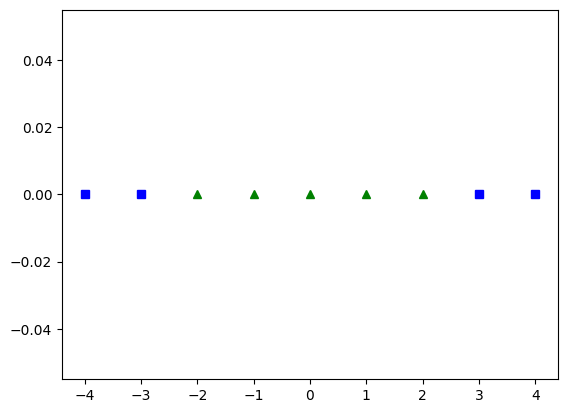

In [4]:
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^");

The dataset isn't linearly separable. We can introduce more features using the polynomial features. Let's add the square of X1D:

In [5]:
X2D = np.c_[X1D, X1D**2]
X2D

array([[-4., 16.],
       [-3.,  9.],
       [-2.,  4.],
       [-1.,  1.],
       [ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  4.],
       [ 3.,  9.],
       [ 4., 16.]])

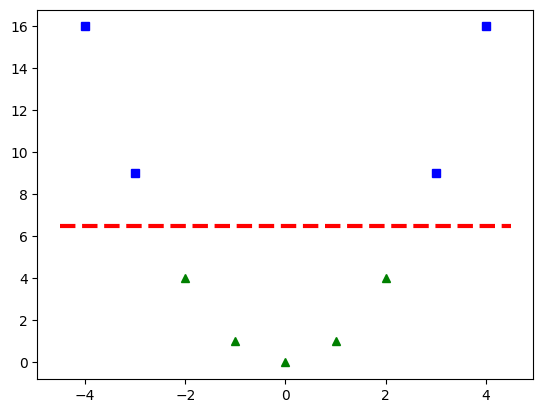

In [6]:
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3);

Adding the square of the values make the dataset linearly separable. 

## SVM with Moons dataset

In [7]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

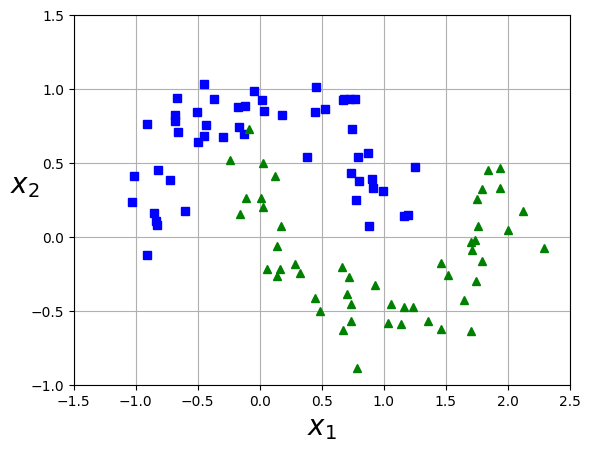

In [8]:
X, y = make_moons(n_samples=100, noise=0.15)
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [9]:
polynomial_svm_clf = Pipeline([
            ("poly_features", PolynomialFeatures(degree=3)),
            ("scaler", StandardScaler()),
            ("svm_clf", LinearSVC(C=10, loss="hinge",max_iter=10000))
        ])
polynomial_svm_clf.fit(X, y)

/Users/Gizem/anaconda3/envs/islp/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=10000))])

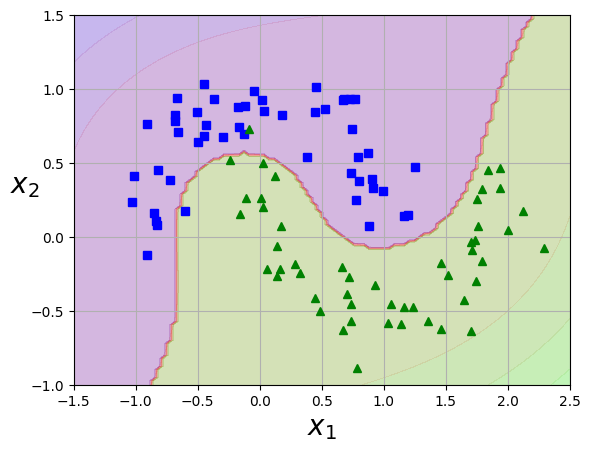

In [10]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

## Using kernels 

In [11]:
from sklearn.svm import SVC 
poly_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
        ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [12]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

Text(0.5, 1.0, '$d=10, r=100, C=5$')

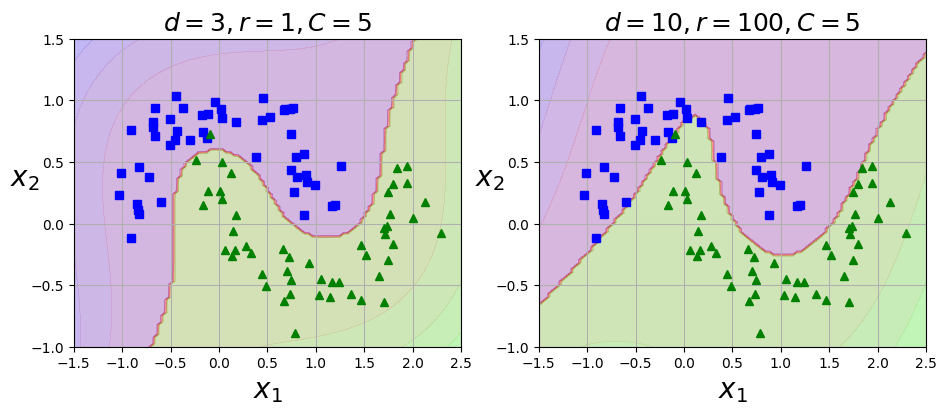

In [13]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)